In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('sentimentdataset.csv')

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
def process_text(text):
    # Tokenization
    tokens = nltk.word_tokenize(text)

    # Remove stop words
    stop_words = set(stopwords.words('english')) | ENGLISH_STOP_WORDS
    tokens = [word for word in tokens if word.lower() not in stop_words]

    # Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]

    # Join tokens back into a string
    processed_text = ' '.join(tokens)

    return processed_text

In [ ]:
df['processed_text'] = df['Text'].apply(process_text)
print(df[['Text', 'processed_text']].head())

                                                Text  \
0   Enjoying a beautiful day at the park!        ...   
1   Traffic was terrible this morning.           ...   
2   Just finished an amazing workout! 💪          ...   
3   Excited about the upcoming weekend getaway!  ...   
4   Trying out a new recipe for dinner tonight.  ...   

                   processed_text  
0         enjoy beauti day park !  
1          traffic terribl morn .  
2         finish amaz workout ! 💪  
3   excit upcom weekend getaway !  
4  tri new recip dinner tonight .  


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vectorizer = CountVectorizer(binary=True)
dtm_boolean = vectorizer.fit_transform(df['processed_text'])
dtm_boolean_df = pd.DataFrame(dtm_boolean.toarray(), columns=vectorizer.get_feature_names_out())

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=5000)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['processed_text'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

In [ ]:
tfidf_df.head()

,ablaz,abstract,abyss,academ,accept,accident,accomplish,ach,achiev,acoust,...,writinggroup,wrong,year,yearbook,yearn,york,young,zen,zero,zest
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['processed_text'], df['Sentiment'], test_size=0.2, random_state=42)

In [ ]:
text_classifier_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),
    ('classifier', SVC(kernel='linear'))
])

In [ ]:
text_classifier_pipeline.fit(X_train, y_train)

predictions = text_classifier_pipeline.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
classification_report_str = classification_report(y_test, predictions)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report_str)

Accuracy: 0.16
Classification Report:
                         precision    recall  f1-score   support

         Acceptance          0.00      0.00      0.00         2
      Acceptance             0.00      0.00      0.00         0
           Admiration        0.00      0.00      0.00         1
        Admiration           0.00      0.00      0.00         1
         Affection           0.00      0.00      0.00         1
      Ambivalence            1.00      1.00      1.00         1
         Anger               0.00      0.00      0.00         1
        Anticipation         0.00      0.00      0.00         1
        Arousal              0.00      0.00      0.00         3
                  Awe        0.00      0.00      0.00         1
         Awe                 0.00      0.00      0.00         1
                  Bad        0.00      0.00      0.00         1
             Betrayal        0.00      0.00      0.00         2
        Betrayal             0.00      0.00      0.00         1


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [ ]:
text_classifier_pipeline_rf = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

In [ ]:
text_classifier_pipeline_rf.fit(X_train, y_train)

predictions = text_classifier_pipeline_rf.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
classification_report_str = classification_report(y_test, predictions)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report_str)

Accuracy: 0.29
Classification Report:
                         precision    recall  f1-score   support

         Acceptance          0.00      0.00      0.00         2
      Acceptance             0.00      0.00      0.00         0
           Admiration        0.00      0.00      0.00         1
         Admiration          0.00      0.00      0.00         0
        Admiration           0.00      0.00      0.00         1
         Affection           0.00      0.00      0.00         1
      Ambivalence            1.00      1.00      1.00         1
         Anger               0.00      0.00      0.00         1
         Anticipation        0.00      0.00      0.00         0
        Anticipation         0.00      0.00      0.00         1
        Arousal              1.00      0.33      0.50         3
        ArtisticBurst        0.00      0.00      0.00         0
                  Awe        0.00      0.00      0.00         1
         Awe                 0.00      0.00      0.00         1


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

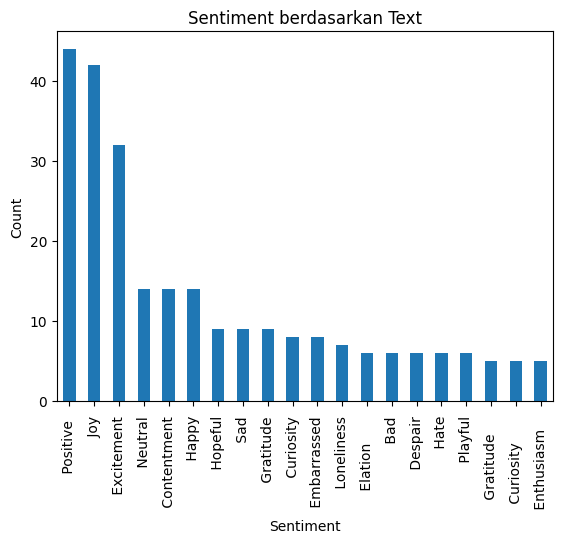

In [ ]:
df['Sentiment'].value_counts().nlargest(20).plot(kind='bar')
plt.title('Sentiment berdasarkan Text')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [ ]:
df['Sentiment'].value_counts()

 Positive           44
 Joy                42
 Excitement         32
 Neutral            14
 Contentment        14
                    ..
 Adrenaline          1
 Harmony             1
 ArtisticBurst       1
 Radiance            1
 Elegance            1
Name: Sentiment, Length: 279, dtype: int64

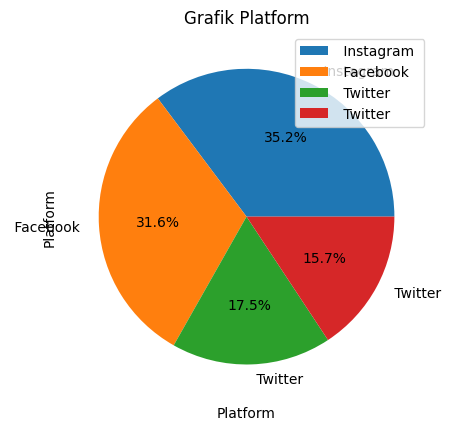

In [ ]:
df['Platform'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Grafik Platform')
plt.xlabel('Platform')
plt.legend()
plt.show()

In [ ]:
df['Platform'].value_counts()

 Instagram     258
 Facebook      231
 Twitter       128
 Twitter       115
Name: Platform, dtype: int64

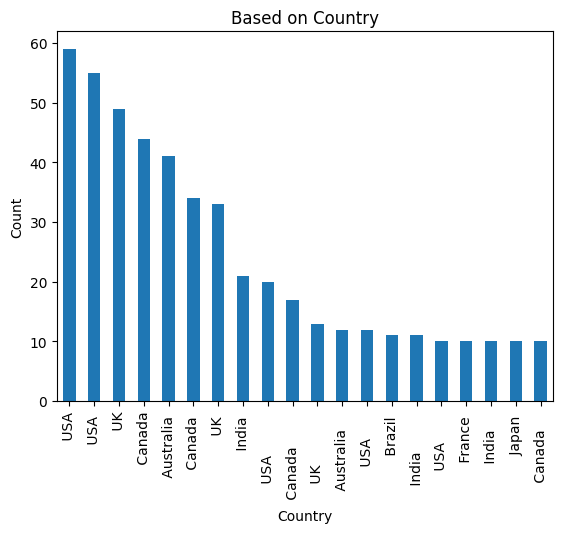

In [ ]:
df['Country'].value_counts().nlargest(20).plot(kind='bar')
plt.title('Based on Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

In [ ]:
df['Country'].value_counts()

 USA               59
 USA               55
 UK                49
 Canada            44
 Australia         41
                   ..
 Netherlands        1
 USA                1
 Germany            1
 France             1
 USA                1
Name: Country, Length: 115, dtype: int64